In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
import arch
from statsmodels.tsa import stattools 
from statsmodels.tsa import arima_model
from statsmodels.graphics.tsaplots import *
from arch.unitroot import ADF
import math

In [6]:
cpiPath = '../YCdata/CPI.csv'
CPI= pd.read_csv(cpiPath,index_col='time')
CPI

,CPI
time,
2014-5-1,100.1
2014-4-1,99.7
2014-3-1,99.5
2014-2-1,100.5
2014-1-1,101.0
...,...
2001-5-1,99.5
2001-4-1,100.2
2001-3-1,99.4


In [7]:
CPI.index = pd.to_datetime(CPI.index)
CPI

,CPI
time,
2014-05-01,100.1
2014-04-01,99.7
2014-03-01,99.5
2014-02-01,100.5
2014-01-01,101.0
...,...
2001-05-01,99.5
2001-04-01,100.2
2001-03-01,99.4


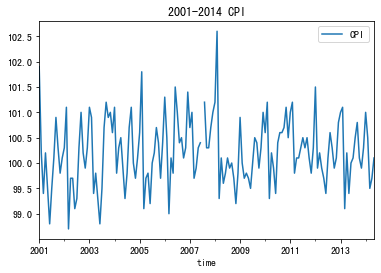

In [10]:
CPI.plot(title = '2001-2014 CPI')

In [12]:
CPITrain=CPI[3:]  #删除前三行
CPITrain

,CPI
time,
2014-02-01,100.5
2014-01-01,101.0
2013-12-01,100.3
2013-11-01,99.9
2013-10-01,100.1
...,...
2001-05-01,99.5
2001-04-01,100.2
2001-03-01,99.4


In [20]:
CPITrain = CPITrain.dropna()#清除垃圾数据
ADF(CPITrain,max_lags=10).summary()

Test Statistic,-2.900
P-value,0.045
Lags,10


In [21]:
box  = stattools.q_stat(stattools.acf(CPITrain)[1:12],len(CPITrain))
box

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


(array([10.79381819, 10.79533381, 11.95624439, 12.78539085, 12.78670887,
        13.70787211, 14.39329518, 14.67887874, 17.0428178 , 17.85199638,
        32.85199284]),
 array([0.0010184 , 0.00452713, 0.00753456, 0.01237344, 0.02546167,
        0.03307518, 0.04461237, 0.06569856, 0.04804966, 0.05751217,
        0.00055601]))

In [22]:
box[1][-1]  #取出相关系数

0.0005560128948515425

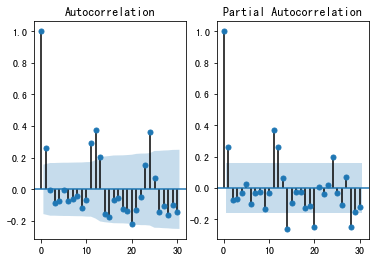

In [26]:
axe1 = plt.subplot(121)
axe2 = plt.subplot(122)
plot1 = plot_acf(CPITrain,lags = 30,ax = axe1) #相关系数
plot2 = plot_pacf(CPITrain,lags = 30,ax = axe2) #偏相关系数

In [28]:
Testmodel2 = arima_model.ARIMA(CPITrain,order = (1,0,1)).fit()
Testmodel2.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


<table class="simpletable">
<caption>ARMA Model Results</caption>
<tr>
  <th>Dep. Variable:</th>        <td>CPI</td>       <th>  No. Observations:  </th>    <td>157</td>  
</tr>
<tr>
  <th>Model:</th>            <td>ARMA(1, 1)</td>    <th>  Log Likelihood     </th> <td>-150.339</td>
</tr>
<tr>
  <th>Method:</th>             <td>css-mle</td>     <th>  S.D. of innovations</th>   <td>0.630</td> 
</tr>
<tr>
  <th>Date:</th>          <td>Sat, 25 Apr 2020</td> <th>  AIC                </th>  <td>308.678</td>
</tr>
<tr>
  <th>Time:</th>              <td>11:51:27</td>     <th>  BIC                </th>  <td>320.903</td>
</tr>
<tr>
  <th>Sample:</th>                <td>0</td>        <th>  HQIC               </th>  <td>313.643</td>
</tr>
<tr>
  <th></th>                       <td> </td>        <th>                     </th>     <td> </td>   
</tr>
</table>
<table class="simpletable">
<tr>
      <td></td>         <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>const</th>     <td>  100.2373</td> <td>    0.066</td> <td> 1516.139</td> <td> 0.000</td> <td>  100.108</td> <td>  100.367</td>
</tr>
<tr>
  <th>ar.L1.CPI</th> <td>    0.0934</td> <td>    0.248</td> <td>    0.377</td> <td> 0.706</td> <td>   -0.392</td> <td>    0.579</td>
</tr>
<tr>
  <th>ma.L1.CPI</th> <td>    0.1932</td> <td>    0.240</td> <td>    0.805</td> <td> 0.421</td> <td>   -0.277</td> <td>    0.664</td>
</tr>
</table>
<table class="simpletable">
<caption>Roots</caption>
<tr>
    <td></td>   <th>            Real</th>  <th>         Imaginary</th> <th>         Modulus</th>  <th>        Frequency</th>
</tr>
<tr>
  <th>AR.1</th> <td>          10.7069</td> <td>          +0.0000j</td> <td>          10.7069</td> <td>           0.0000</td>
</tr>
<tr>
  <th>MA.1</th> <td>          -5.1771</td> <td>          +0.0000j</td> <td>           5.1771</td> <td>           0.5000</td>
</tr>
</table>

In [30]:
Testmodel3 = arima_model.ARIMA(CPITrain,order = (2,0,1)).fit()
Testmodel4 = arima_model.ARIMA(CPITrain,order = (2,0,2)).fit()
Testmodel5 = arima_model.ARIMA(CPITrain,order = (3,0,1)).fit()
Testmodel6 = arima_model.ARIMA(CPITrain,order = (3,0,2)).fit()
Testmodel6.conf_int() #

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8

,0,1
const,100.093868,100.379722
ar.L1.CPI,1.301691,1.609373
ar.L2.CPI,-1.478539,-1.109157
ar.L3.CPI,0.205484,0.503178
ma.L1.CPI,-1.313938,-1.183402
ma.L2.CPI,0.946969,1.053031


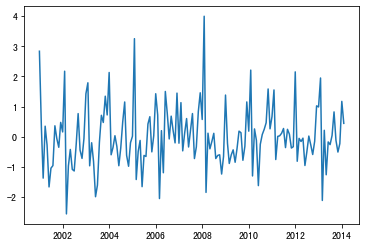

In [31]:
stdresid = Testmodel6.resid/math.sqrt(Testmodel6.sigma2)
plt.plot(stdresid)

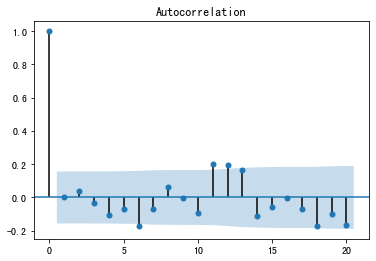

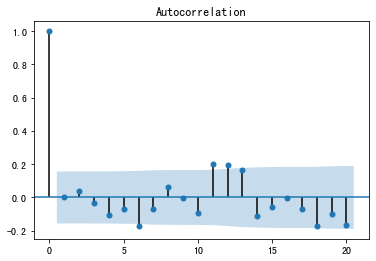

In [33]:
plot_acf(stdresid,lags=20)

In [34]:
box1 = stattools.q_stat(stattools.acf(stdresid)[1:13],len(stdresid))
box1

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


(array([1.62506571e-03, 2.24005144e-01, 4.03789515e-01, 2.20915348e+00,
        3.04082484e+00, 8.04878421e+00, 8.81935529e+00, 9.48591640e+00,
        9.48628321e+00, 1.09397722e+01, 1.80552690e+01, 2.48154633e+01]),
 array([0.9678443 , 0.89404196, 0.93945856, 0.69735382, 0.69369174,
        0.234551  , 0.26588718, 0.30297521, 0.39364837, 0.36222954,
        0.08030701, 0.01572195]))

In [36]:
box1[1][-1]

0.015721952974481618

In [37]:
box1 = stattools.q_stat(stattools.acf(stdresid)[1:20],len(stdresid))
box1[1][-1]

0.003412704205787749

In [38]:
Testmodel6.forecast(3)[0]  #预测后续三天的结果


array([100.49999663, 100.13102838, 100.33163059])

In [39]:
CPI.head(3)  

,CPI
time,
2014-05-01,100.1
2014-04-01,99.7
2014-03-01,99.5


In [40]:
Testmodel6.forecast(5)[0]

array([100.49999663, 100.13102838, 100.33163059, 100.60493778,
       100.61245962])

In [41]:
path = '../YCdata/Datang.csv'
Datang = pd.read_csv(path,index_col='time')
Datang


,datang
time,
2008/01/02,0.0000
2008/01/03,2.2152
2008/01/04,0.1548
2008/01/07,1.8547
2008/01/08,-0.1517
...,...
2016/05/03,4.2037
2016/05/04,-0.7955
2016/05/05,-0.9737


In [42]:
Datang.index = pd.to_datetime(Datang.index)
Datang.head()

,datang
time,
2008-01-02,0.0000
2008-01-03,2.2152
2008-01-04,0.1548
2008-01-07,1.8547
2008-01-08,-0.1517


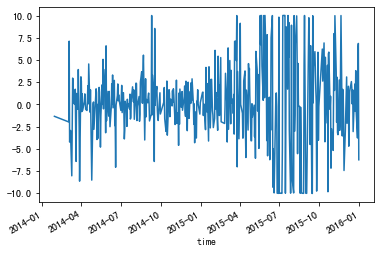

In [44]:
returns = Datang.datang['2014-01-01':'2016-01-01']
returns.plot()

In [45]:
ADF(returns).summary()

Test Statistic,-18.288
P-value,0.000
Lags,0


In [48]:
stattools.q_stat(stattools.acf(returns)[1:12],len(returns))[1]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([0.00203329, 0.00734689, 0.01341783, 0.01713763, 0.02968939,
       0.04376739, 0.0415143 , 0.008257  , 0.01109367, 0.00375598,
       0.00635125])

In [50]:
model = arima_model.ARIMA(returns,order = (1,0,0)).fit()
model.summary()


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<table class="simpletable">
<caption>ARMA Model Results</caption>
<tr>
  <th>Dep. Variable:</th>      <td>datang</td>      <th>  No. Observations:  </th>    <td>453</td>   
</tr>
<tr>
  <th>Model:</th>            <td>ARMA(1, 0)</td>    <th>  Log Likelihood     </th> <td>-1313.251</td>
</tr>
<tr>
  <th>Method:</th>             <td>css-mle</td>     <th>  S.D. of innovations</th>   <td>4.393</td>  
</tr>
<tr>
  <th>Date:</th>          <td>Sat, 25 Apr 2020</td> <th>  AIC                </th> <td>2632.502</td> 
</tr>
<tr>
  <th>Time:</th>              <td>13:43:32</td>     <th>  BIC                </th> <td>2644.849</td> 
</tr>
<tr>
  <th>Sample:</th>                <td>0</td>        <th>  HQIC               </th> <td>2637.367</td> 
</tr>
<tr>
  <th></th>                       <td> </td>        <th>                     </th>     <td> </td>    
</tr>
</table>
<table class="simpletable">
<tr>
        <td></td>          <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>const</th>        <td>    0.1417</td> <td>    0.241</td> <td>    0.587</td> <td> 0.557</td> <td>   -0.331</td> <td>    0.615</td>
</tr>
<tr>
  <th>ar.L1.datang</th> <td>    0.1449</td> <td>    0.047</td> <td>    3.112</td> <td> 0.002</td> <td>    0.054</td> <td>    0.236</td>
</tr>
</table>
<table class="simpletable">
<caption>Roots</caption>
<tr>
    <td></td>   <th>            Real</th>  <th>         Imaginary</th> <th>         Modulus</th>  <th>        Frequency</th>
</tr>
<tr>
  <th>AR.1</th> <td>           6.9032</td> <td>          +0.0000j</td> <td>           6.9032</td> <td>           0.0000</td>
</tr>
</table>

In [51]:
model.conf_int()

,0,1
const,-0.331197,0.614627
ar.L1.datang,0.053630,0.236092


In [54]:
stdresid = model.resid/math.sqrt(model.sigma2)  #计算相关系数，预测未来
stdresid

time
2014-01-29   -0.337005
2014-03-03   -0.432252
2014-03-04    1.657475
2014-03-05   -1.226699
2014-03-06   -0.791966
                ...   
2015-12-25   -0.331049
2015-12-28   -0.861290
2015-12-29    1.500584
2015-12-30    1.331580
2015-12-31   -1.672821
Length: 453, dtype: float64

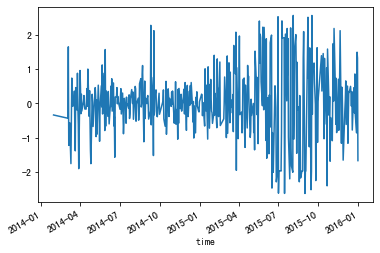

In [55]:
stdresid.plot()

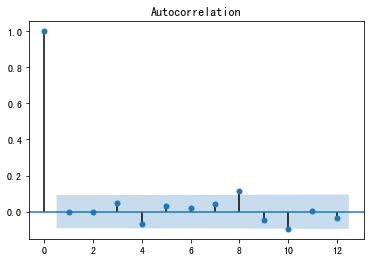

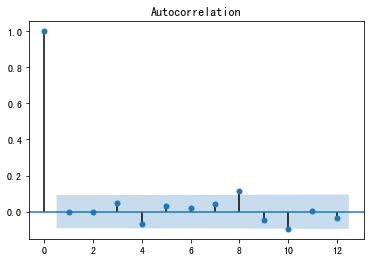

In [57]:
plot_acf(stdresid,lags =12)

In [58]:
model.forecast(3)[0]

array([-0.78178734,  0.00793633,  0.12233614])

In [59]:
Datang.datang['2016-01-01':'2016-01-15']

time
2016-01-04   -10.0122
2016-01-05    -4.1441
2016-01-06     2.0207
2016-01-07    -9.9954
2016-01-08     0.4606
2016-01-11    -9.9847
2016-01-12    -0.3396
2016-01-13    -6.2465
2016-01-14     3.6947
2016-01-15    -4.8481
Name: datang, dtype: float64

In [61]:
model.forecast(10)[0]

array([-0.78178734,  0.00793633,  0.12233614,  0.13890816,  0.1413088 ,
        0.14165655,  0.14170693,  0.14171423,  0.14171528,  0.14171544])